# Abundance zeropoints

## Author(s): Sven Buder (SB, WG4)

### History:
180926 SB Created  
191126 SB Reformatted with final abundance measurements

In [55]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import sys
import collections
import glob
import pickle
import pandas

# Packages to work with FITS and (IDL) SME.out files
import astropy.io.fits as pyfits
import astropy.table as table
from astropy.table import Table, join
from scipy.io.idl import readsav

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
#     'font.family'        : 'sans',
#     'font.size'          : 17,
#     'axes.labelsize'     : 20,
#     'ytick.labelsize'    : 16,
#     'xtick.labelsize'    : 16,
#     'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [56]:
final_elements = [
    'teff','logg','fe_h',
    #'fe_h_atmo','vmic','vbroad',
    'Li','C','O','Na','Mg5711','Al','Si','K7699','Ca',
    'Sc']

# Measurements from Skyflats and Arcturus

In [57]:
def get_galah_sun_10k_43():
    gbs_lbol     = pyfits.getdata('../../processing/sme_result_files/GALAH_10k_43_lbol_final.fits',1)
    gbs_sun      = gbs_lbol[(gbs_lbol['sobject_id'] == 150405000901378)][0]
    
    galah_sun = collections.OrderedDict()
    galah_sun['teff'] = [float('%.0f' % gbs_sun['TEFF']), float('%.0f' % gbs_sun['E_TEFF'])] 
    galah_sun['logg'] = [float('%.2f' % gbs_sun['LOGG']), float(0.0)] 
    galah_sun['fe_h'] = [float('%.2f' % gbs_sun['FEH']), float(0.0)] 
    galah_sun['fe_h_atmo'] = [float('%.2f' % gbs_sun['FEH']), float(0.0)] 
    galah_sun['vmic'] = [float('%.2f' % gbs_sun['VMIC']), float(0.0)] 
    galah_sun['vbroad'] = [float('%.2f' % gbs_sun['VSINI']), float(0.0)] 
    galah_sun['mass'] = [float('%.2f' % gbs_sun['MASS']), float(0.0)] 
    galah_sun['lbol'] = [float('%.2f' % gbs_sun['LBOL']), float(0.0)] 
    galah_sun['age']  = [float('%.2f' % gbs_sun['AGE']), float(0.0)] 
    galah_sun['chi2_sp']  = [float('%.2f' % gbs_sun['CHI'][0]), float(0.0)] 
    galah_sun['alpha_fe']  = [float('%.2f' % gbs_sun['ALPHA_FE']), float(0.0)]
    for iterator, each_mode in enumerate(gbs_sun['MODE']):
        if (each_mode != 'Sp') & (len(each_mode) >=1):
            if (len(each_mode) <= 2):
                galah_sun["A_"+each_mode] = np.array([
                    float('%.2f' % gbs_sun['A_ABUND'][iterator]), 
                    float('%.2f' % gbs_sun['C_ABUND'][iterator]),

                ])
            else:
                galah_sun["A_"+each_mode] = np.array([
                    float('%.2f' % gbs_sun['A_ABUND'][iterator]), 
                    float('%.2f' % gbs_sun['C_ABUND'][iterator])
                ])
                
    return(galah_sun)
galah_sun = get_galah_sun_10k_43()

In [58]:
def get_galah_sun_gbs():
    gbs_lbol     = pyfits.getdata('../stellar_parameters/gaia_fgk_benchmark_stars/data/GALAH_gbs_lbol.fits',1)
    gbs_sun      = gbs_lbol[(gbs_lbol['sobject_id'] == 150405000901378)][0]
    
    galah_sun = collections.OrderedDict()
    galah_sun['teff'] = [float('%.0f' % gbs_sun['TEFF']), float('%.0f' % gbs_sun['E_TEFF'])] 
    galah_sun['logg'] = [float('%.2f' % gbs_sun['LOGG']), float(0.0)] 
    galah_sun['fe_h'] = [float('%.2f' % gbs_sun['FEH']), float(0.0)] 
    galah_sun['fe_h_atmo'] = [float('%.2f' % gbs_sun['FEH']), float(0.0)] 
    galah_sun['vmic'] = [float('%.2f' % gbs_sun['VMIC']), float(0.0)] 
    galah_sun['vbroad'] = [float('%.2f' % gbs_sun['VSINI']), float(0.0)] 
    galah_sun['mass'] = [float('%.2f' % gbs_sun['MASS']), float(0.0)] 
    galah_sun['lbol'] = [float('%.2f' % gbs_sun['LBOL']), float(0.0)] 
    galah_sun['age']  = [float('%.2f' % gbs_sun['AGE']), float(0.0)]
    for iterator, each_mode in enumerate(gbs_sun['MODE']):
        if (each_mode != 'Sp') & (len(each_mode) >=1):
            if (len(each_mode) <= 2):
                galah_sun["A_"+each_mode] = np.array([
                    float('%.2f' % gbs_sun['A_ABUND'][iterator]), 
                    float('%.2f' % gbs_sun['C_ABUND'][iterator]),

                ])
            else:
                galah_sun["A_"+each_mode] = np.array([
                    float('%.2f' % gbs_sun['A_ABUND'][iterator]), 
                    float('%.2f' % gbs_sun['C_ABUND'][iterator])
                ])
                
    return(galah_sun)
galah_sun_gbs = get_galah_sun_gbs()

In [59]:
def get_galah_arcturus():
    gbs_lbol     = pyfits.getdata('../stellar_parameters/gaia_fgk_benchmark_stars/data/GALAH_gbs_lbol.fits',1)
    gbs_arcturus = gbs_lbol[(gbs_lbol['sobject_id'] == 150210005801171)][0]

    galah_arcturus = collections.OrderedDict()

    galah_arcturus['teff'] = ['%.0f' % gbs_arcturus['TEFF'], '%.0f' % gbs_arcturus['E_TEFF']] 
    galah_arcturus['logg'] = ['%.2f' % gbs_arcturus['LOGG'], np.nan] 
    galah_arcturus['fe_h'] = ['%.2f' % gbs_arcturus['FEH'], np.nan]
    galah_arcturus['fe_h_atmo'] = ['%.2f' % gbs_arcturus['FEH'], np.nan]
    galah_arcturus['vmic'] = ['%.2f' % gbs_arcturus['VMIC'], np.nan]
    galah_arcturus['vbroad'] = ['%.2f' % gbs_arcturus['VSINI'], np.nan]
    galah_arcturus['mass'] = ['%.2f' % gbs_arcturus['MASS'], np.nan] 
    galah_arcturus['lbol'] = ['%.2f' % gbs_arcturus['LBOL'], np.nan] 
    galah_arcturus['age']  = ['%.2f' % gbs_arcturus['AGE'], np.nan] 
    galah_arcturus['chi2_sp']  = ['%.2f' % gbs_arcturus['CHI'][0], np.nan] 

    # Z, A_X, e_A_X

    for iterator, each_mode in enumerate(gbs_arcturus['MODE']):
        if (each_mode != 'Sp') & (len(each_mode) >=1) & (each_mode not in ['Si6742','Ca6472','Ti6689','Ti6743','Ti6746']):
            if (len(each_mode) <= 2):
                galah_arcturus["A_"+each_mode] = np.array([
                    float('%.2f' % gbs_arcturus['A_ABUND'][iterator]), 
                    float('%.2f' % gbs_arcturus['E_ABUND'][iterator])
                ])
            else:

                galah_arcturus["A_"+each_mode] = np.array([
                    float('%.2f' % gbs_arcturus['A_ABUND'][iterator]), 
                    float('%.2f' % gbs_arcturus['E_ABUND'][iterator])
                ])

    return(galah_arcturus)
galah_arcturus = get_galah_arcturus()

In [60]:
sun_skyflat = collections.OrderedDict()

for each_key in galah_sun:
    
    try:
        sun_skyflat[each_key] = galah_sun[each_key]
    except:
        sun_skyflat[each_key] = ['n.a.','n.a.']

In [61]:
arcturus_galah = collections.OrderedDict()

for each_key in galah_sun:
    
    try:
        print(each_key, galah_arcturus['A_'+each_key],'')
        arcturus_galah[each_key] = galah_arcturus['A_'+each_key]
    except:
        if each_key == 'Li':
            arcturus_galah['Li'] = galah_arcturus['A_Li']
        arcturus_galah[each_key] = ['n.a.','n.a.']

# Reference values

In [62]:
# sun_grevesse

sun_grevesse = collections.OrderedDict()

sun_grevesse['teff'] = [np.NaN,np.NaN]
sun_grevesse['logg'] = [np.NaN,np.NaN]
sun_grevesse['fe_h'] = [np.NaN,np.NaN]
sun_grevesse['fe_h_atmo'] = [np.NaN,np.NaN]
sun_grevesse['vmic'] = [np.NaN,np.NaN]
sun_grevesse['vbroad'] = [np.NaN,np.NaN]
sun_grevesse['mass'] = [np.NaN,np.NaN]
sun_grevesse['lbol'] = [np.NaN,np.NaN]
sun_grevesse['age'] = [np.NaN,np.NaN]
sun_grevesse['chi2_sp'] = [np.NaN,np.NaN]
sun_grevesse['alpha_fe'] = [np.NaN,np.NaN]
sun_grevesse['A_Li'] = [1.05,0.10]
sun_grevesse['A_C']  = [8.39,0.05]
sun_grevesse['A_O']  = [8.66,0.05]
sun_grevesse['A_Na'] = [6.17,0.04]
sun_grevesse['A_Mg'] = [7.53,0.09]
sun_grevesse['A_Al'] = [6.37,0.06]
sun_grevesse['A_Si'] = [7.51,0.04]
sun_grevesse['A_K']  = [5.08,0.07]
sun_grevesse['A_Ca'] = [6.31,0.04]
sun_grevesse['A_Sc'] = [3.17,0.10]
sun_grevesse['A_Ti'] = [4.90,0.06]
sun_grevesse['A_V']  = [4.00,0.02]
sun_grevesse['A_Cr'] = [5.64,0.10]
sun_grevesse['A_Mn'] = [5.39,0.03]
sun_grevesse['A_Fe'] = [7.45,0.05]
sun_grevesse['A_Co'] = [4.92,0.08]
sun_grevesse['A_Ni'] = [6.23,0.04]
sun_grevesse['A_Cu'] = [4.21,0.04]
sun_grevesse['A_Zn'] = [4.60,0.03]
sun_grevesse['A_Rb'] = [2.60,0.15]
sun_grevesse['A_Sr'] = [2.92,0.05]
sun_grevesse['A_Y']  = [2.21,0.02]
sun_grevesse['A_Zr'] = [2.58,0.02]
sun_grevesse['A_Mo'] = [1.92,0.05]
sun_grevesse['A_Ru'] = [1.84,0.07]
sun_grevesse['A_Ba'] = [2.17,0.07]
sun_grevesse['A_La'] = [1.13,0.05]
sun_grevesse['A_Ce'] = [1.70,0.10]
sun_grevesse['A_Nd'] = [1.45,0.05]
sun_grevesse['A_Sm'] = [1.00,0.03]
sun_grevesse['A_Eu'] = [0.52,0.06]

In [63]:
# sun_asplund
sun_asplund = collections.OrderedDict()

sun_asplund['teff'] = [np.NaN,np.NaN]
sun_asplund['logg'] = [np.NaN,np.NaN]
sun_asplund['fe_h'] = [np.NaN,np.NaN]
sun_asplund['fe_h_atmo'] = [np.NaN,np.NaN]
sun_asplund['vmic'] = [np.NaN,np.NaN]
sun_asplund['vbroad'] = [np.NaN,np.NaN]
sun_asplund['mass'] = [np.NaN,np.NaN]
sun_asplund['lbol'] = [np.NaN,np.NaN]
sun_asplund['age'] = [np.NaN,np.NaN]
sun_asplund['chi2_sp'] = [np.NaN,np.NaN]
sun_asplund['alpha_fe'] = [np.NaN,np.NaN]
sun_asplund['A_Li'] = [1.05, 0.10]
sun_asplund['A_C'] = [8.43, 0.05]
sun_asplund['A_O']  = [8.69, 0.05]
sun_asplund['A_Na'] = [6.24, 0.04]
sun_asplund['A_Mg'] = [7.60, 0.04]
sun_asplund['A_Al'] = [6.45, 0.03]
sun_asplund['A_Si'] = [7.51, 0.03]
sun_asplund['A_K']  = [5.03, 0.09]
sun_asplund['A_Ca'] = [6.34, 0.04]
sun_asplund['A_Sc'] = [3.15, 0.04]
sun_asplund['A_Ti'] = [4.95, 0.05]
sun_asplund['A_V']  = [3.93, 0.08]
sun_asplund['A_Cr'] = [5.64, 0.04]
sun_asplund['A_Mn'] = [5.43, 0.04]
sun_asplund['A_Fe'] = [7.50, 0.04]
sun_asplund['A_Co'] = [4.99, 0.07]
sun_asplund['A_Ni'] = [6.22, 0.04]
sun_asplund['A_Cu'] = [4.19, 0.04]
sun_asplund['A_Zn'] = [4.56, 0.05]
sun_asplund['A_Rb'] = [2.52, 0.10]
sun_asplund['A_Sr'] = [2.87, 0.07]
sun_asplund['A_Y']  = [2.21, 0.05]
sun_asplund['A_Zr'] = [2.58, 0.04]
sun_asplund['A_Mo'] = [1.88, 0.08]
sun_asplund['A_Ru'] = [1.75, 0.08]
sun_asplund['A_Ba'] = [2.18, 0.09]
sun_asplund['A_La'] = [1.10, 0.04]
sun_asplund['A_Ce'] = [1.58, 0.04]
sun_asplund['A_Nd'] = [1.42, 0.04]
sun_asplund['A_Sm'] = [0.96, 0.04]
sun_asplund['A_Eu'] = [0.52, 0.04]

In [64]:
# arcturus_ramirez 

arcturus_ramirez = collections.OrderedDict()

arcturus_ramirez['teff'] = [4286,30]
arcturus_ramirez['logg'] = [1.66,0.05]
arcturus_ramirez['fe_h'] = [-0.52,0.04]

arcturus_ramirez['Li'] = [np.NaN,np.NaN]
arcturus_ramirez['C']  = [0.43,0.07]
arcturus_ramirez['O']  = [0.50,0.03]
arcturus_ramirez['Na'] = [0.11,0.03]
arcturus_ramirez['Mg'] = [0.37,0.03]
arcturus_ramirez['Al'] = [0.34,0.03]
arcturus_ramirez['Si'] = [0.33,0.04]
arcturus_ramirez['K']  = [0.20,0.07]
arcturus_ramirez['Ca'] = [0.11,0.04]
arcturus_ramirez['Sc'] = [0.15,0.08]
#arcturus_ramirez['ScII'] = [0.23,0.04]
arcturus_ramirez['Ti'] = [0.27,0.05]
#arcturus_ramirez['TiII'] = [0.21,0.04]
arcturus_ramirez['V']  = [0.20,0.05]
arcturus_ramirez['Cr'] = [-0.05,0.04]
arcturus_ramirez['Mn'] = [-0.21,0.04]
arcturus_ramirez['Fe'] = [np.NaN,np.NaN]
arcturus_ramirez['Co'] = [0.09,0.04]
arcturus_ramirez['Ni'] = [0.06,0.03]
arcturus_ramirez['Cu'] = [np.NaN,np.NaN]
arcturus_ramirez['Zn'] = [0.22,0.06]
arcturus_ramirez['Rb'] = [np.NaN,np.NaN]
arcturus_ramirez['Sr'] = [np.NaN,np.NaN]
arcturus_ramirez['Y']  = [np.NaN,np.NaN]
arcturus_ramirez['Zr'] = [np.NaN,np.NaN]
arcturus_ramirez['Mo'] = [np.NaN,np.NaN]
arcturus_ramirez['Ru'] = [np.NaN,np.NaN]
arcturus_ramirez['Ba'] = [np.NaN,np.NaN]
arcturus_ramirez['La'] = [np.NaN,np.NaN]
arcturus_ramirez['Ce'] = [np.NaN,np.NaN]
arcturus_ramirez['Nd'] = [np.NaN,np.NaN]
arcturus_ramirez['Sm'] = [np.NaN,np.NaN]
arcturus_ramirez['Eu'] = [np.NaN,np.NaN]

In [65]:
# arcturus_apogee 

arcturus_apogee = collections.OrderedDict()

# Atmosphere see Holtzmann+19
# arcturus_apogee['teff'] = [4286,np.NaN]
# arcturus_apogee['logg'] = [1.66,np.NaN]
# arcturus_apogee['fe_h'] = [-0.52,np.NaN]
# arcturus_apogee['Li'] = [np.NaN,np.NaN]
# arcturus_apogee['C']  = [7.96,np.NaN]
# arcturus_apogee['O']  = [8.62,np.NaN]
# arcturus_apogee['Na'] = [5.86,np.NaN]
# arcturus_apogee['Mg'] = [7.38,np.NaN]
# arcturus_apogee['Al'] = [6.25,np.NaN]
# arcturus_apogee['Si'] = [7.32,np.NaN]
# arcturus_apogee['K']  = [4.76,np.NaN]
# arcturus_apogee['Ca'] = [5.88,np.NaN]
# arcturus_apogee['Sc'] = [2.72,np.NaN]
# arcturus_apogee['Ti'] = [4.63,np.NaN]
# arcturus_apogee['V']  = [3.64,np.NaN]
# arcturus_apogee['Cr'] = [5.07,np.NaN]
# arcturus_apogee['Mn'] = [4.75,np.NaN]
# arcturus_apogee['Fe'] = [6.93,np.NaN]
# arcturus_apogee['Co'] = [4.44,np.NaN]
# arcturus_apogee['Ni'] = [5.74,np.NaN]
# arcturus_apogee['Cu'] = [3.64,np.NaN]

# Actual DR14 catalog entry
arcturus_apogee['teff'] = [4290,56]
arcturus_apogee['logg'] = [1.70,0.06]
arcturus_apogee['vmic'] = [1.48,np.NaN]
arcturus_apogee['vbroad'] = [10,np.NaN]
arcturus_apogee['fe_h'] = [-0.47,0.01]

arcturus_apogee['Li'] = [np.NaN,np.NaN]
arcturus_apogee['C']  = [0.10,0.03]
arcturus_apogee['O']  = [0.22,0.02]
arcturus_apogee['Na'] = [-0.09,0.06]
arcturus_apogee['Mg'] = [0.24,0.02]
arcturus_apogee['Al'] = [0.16,0.04]
arcturus_apogee['Si'] = [0.18,0.03]
arcturus_apogee['K']  = [0.12,0.03]
arcturus_apogee['Ca'] = [0.11,0.02]
arcturus_apogee['Sc'] = [np.NaN,np.NaN]
arcturus_apogee['Ti'] = [0.08,0.03]
#arcturus_apogee['TiII'] = [0.31,0.08]
arcturus_apogee['V']  = [-0.07,0.06]
arcturus_apogee['Cr'] = [0.08,0.04]
arcturus_apogee['Mn'] = [-0.19,0.02]
arcturus_apogee['Fe'] = [np.NaN,np.NaN]
arcturus_apogee['Co'] = [0.20,0.05]
arcturus_apogee['Ni'] = [0.11,0.02]
arcturus_apogee['Cu'] = [np.NaN,np.NaN]
arcturus_apogee['Zn'] = [np.NaN,np.NaN]
arcturus_apogee['Rb'] = [np.NaN,np.NaN]
arcturus_apogee['Sr'] = [np.NaN,np.NaN]
arcturus_apogee['Y']  = [np.NaN,np.NaN]
arcturus_apogee['Zr'] = [np.NaN,np.NaN]
arcturus_apogee['Mo'] = [np.NaN,np.NaN]
arcturus_apogee['Ru'] = [np.NaN,np.NaN]
arcturus_apogee['Ba'] = [np.NaN,np.NaN]
arcturus_apogee['La'] = [np.NaN,np.NaN]
arcturus_apogee['Ce'] = [np.NaN,np.NaN]
arcturus_apogee['Nd'] = [np.NaN,np.NaN]
arcturus_apogee['Sm'] = [np.NaN,np.NaN]
arcturus_apogee['Eu'] = [np.NaN,np.NaN]

# Final values

In [66]:
sun_adopted = collections.OrderedDict()

for each_key in galah_sun.keys():
    sun_adopted[each_key] = np.array(galah_sun[each_key])

sun_adopted['teff']   = [5772,np.NaN]
sun_adopted['logg']   = [4.44,np.NaN]
sun_adopted['fe_h']   = [0.00,np.NaN]
sun_adopted['fe_h_atmo'] = [0.00, np.NaN]
sun_adopted['vmic'] = [1.06 , 0.00] # GBS
sun_adopted['vbroad'] = [np.sqrt(4.00**2. + 1.6**2.),np.NaN] # GBS
sun_adopted['mass'] = [1.00 , np.NaN] # by definition
sun_adopted['lbol'] = [1.00 , np.NaN] # by definition
sun_adopted['age']  = [4.57 , 0.11] # Bonanno et al., 2002, A&A, 390, 1115
sun_adopted['chi2_sp']  = [1.00, 0.00]
sun_adopted['alpha_fe']  = [0.00, 0.00]

In [67]:
sun_adopted['A_Li6708'] = [1.05, np.sqrt(galah_sun['A_Li6708'][1]**2 + 0.1**2)]
sun_adopted['A_Li6708_NoRV'] = [1.05, np.sqrt(galah_sun['A_Li6708'][1]**2 + 0.1**2)]

In [68]:
sun_adopted['A_C6588'] = [8.43+0.02, np.sqrt(galah_sun['A_C6588'][1]**2 + 0.06**2)]

In [69]:
sun_adopted['A_O'] = [8.69+0.13, np.sqrt(galah_sun['A_O'][1]**2 + 0.00**2)]

In [70]:
sun_adopted['A_Na'][0] = 6.17+0.05 #
sun_adopted['A_Na'][1] = np.sqrt(galah_sun['A_Na'][1]**2 + 0.09**2)

In [71]:
sun_adopted['A_Mg5711'][0] = 7.53+0.07 #
sun_adopted['A_Mg5711'][1] = np.sqrt(galah_sun['A_Mg5711'][1]**2 + 0.07**2)

In [72]:
sun_adopted['A_Al'][0] = 6.37+0.06
sun_adopted['A_Al'][1] = np.sqrt(galah_sun['A_Al'][1]**2 + 0.04**2)

In [73]:
sun_adopted['A_Si'][0] = 7.51-0.04
sun_adopted['A_Si'][1] = np.sqrt(galah_sun['A_Si'][1]**2 + 0.06**2)

In [74]:
sun_adopted['A_K7699'][0] = 5.08-0.01
sun_adopted['A_K7699'][1] = np.sqrt(galah_sun['A_K7699'][1]**2 + 0.10**2)

In [75]:
sun_adopted['A_Ca'][0] = 6.31-0.09
sun_adopted['A_Ca'][1] = np.sqrt(galah_sun['A_Ca'][1]**2 + 0.12**2)

In [76]:
sun_adopted['A_Sc'] = [3.17-0.01, np.sqrt(0.05**2 + 0.01**2)]

In [77]:
sun_adopted['A_Ti4758'][0] = 4.70 # shifted by -0.05 wrt skyflat fit
sun_adopted['A_Ti4758'][1] = np.sqrt(galah_sun['A_Ti4758'][1]**2 + 0.05**2)
sun_adopted['A_Ti4759'][0] = 4.72 # shifted by 0.00 wrt skyflat fit
sun_adopted['A_Ti4759'][1] = np.sqrt(galah_sun['A_Ti4759'][1]**2 + 0.00**2)
sun_adopted['A_Ti4778'][0] = 4.90 # shifted by 0.00 wrt skyflat fit
sun_adopted['A_Ti4778'][1] = np.sqrt(galah_sun['A_Ti4759'][1]**2 + 0.00**2)
sun_adopted['A_Ti4782'][0] = 5.04 # shifted by 0.00 wrt skyflat fit
sun_adopted['A_Ti4782'][1] = np.sqrt(galah_sun['A_Ti4782'][1]**2 + 0.00**2)
sun_adopted['A_Ti4798'][0] = 4.70 # shifted by NaN wrt skyflat fit
sun_adopted['A_Ti4798'][1] = 0.2 # wrt to Grevesse A(Ti)
sun_adopted['A_Ti4802'][0] = 5.05 # shifted by NaN wrt skyflat fit
sun_adopted['A_Ti4802'][1] = 0.15 # wrt to Grevesse A(Ti)
sun_adopted['A_Ti4820'][0] = 4.80 # shifted by 0.00 wrt skyflat fit
sun_adopted['A_Ti4820'][1] = np.sqrt(galah_sun['A_Ti4759'][1]**2 + 0.05**2)
sun_adopted['A_Ti5689'][0] = 4.83 # shifted by 0.08 wrt skyflat fit
sun_adopted['A_Ti5689'][1] = np.sqrt(galah_sun['A_Ti5689'][1]**2 + 0.08**2)
sun_adopted['A_Ti5716'][0] = 4.90 # shifted by NaN wrt skyflat fit
sun_adopted['A_Ti5716'][1] = 0.1 # is Grevesse, but no detection
sun_adopted['A_Ti5720'][0] = 5.00 # shifted by 0.00 wrt skyflat fit
sun_adopted['A_Ti5720'][1] = np.sqrt(galah_sun['A_Ti4759'][1]**2 + 0.18**2)
sun_adopted['A_Ti5739'][0] = 4.82 # shifted by 0.09 wrt skyflat fit
sun_adopted['A_Ti5739'][1] = np.sqrt(galah_sun['A_Ti4759'][1]**2 + 0.09**2)
sun_adopted['A_Ti5866'][0] = 4.85 # shifted by 0.00 wrt skyflat fit
sun_adopted['A_Ti5866'][1] = np.sqrt(galah_sun['A_Ti5866'][1]**2 + 0.00**2)
sun_adopted['A_Ti6717'][0] = 5.2 # shifted by NaN wrt skyflat fit
sun_adopted['A_Ti6717'][1] = 0.3 # wrt to Grevesse A(Ti)
sun_adopted['A_Ti7853'][0] = 4.86 # shifted by NaN wrt skyflat fit
sun_adopted['A_Ti7853'][1] = 0.04 # wrt to Grevesse A(Ti)
sun_adopted['A_Ti4720'][0] = 5.12 # shifted by NaN wrt skyflat fit
sun_adopted['A_Ti4720'][1] = 0.22 # wrt to Grevesse A(Ti)
sun_adopted['A_Ti4765'][0] = 4.85 # shifted by NaN wrt skyflat fit
sun_adopted['A_Ti4765'][1] = 0.05 # wrt to Grevesse A(Ti)
sun_adopted['A_Ti4799'][0] = 4.85 # shifted by NaN wrt skyflat fit
sun_adopted['A_Ti4799'][1] = 0.05 # wrt to Grevesse A(Ti)
sun_adopted['A_Ti4849'][0] = 5.18 # shifted by 0.09 wrt skyflat fit
sun_adopted['A_Ti4849'][1] = np.sqrt(galah_sun['A_Ti4849'][1]**2 + 0.00**2)
sun_adopted['A_Ti4866'][0] = 5.12 # shifted by 0.00 wrt skyflat fit
sun_adopted['A_Ti4866'][1] = np.sqrt(galah_sun['A_Ti4866'][1]**2 + 0.00**2)
sun_adopted['A_Ti4874'][0] = 4.95 # shifted by 0.01 wrt skyflat fit
sun_adopted['A_Ti4874'][1] = np.sqrt(galah_sun['A_Ti4874'][1]**2 + 0.06**2)

In [78]:
sun_adopted['A_V4784'] = [4.00-0.01 , np.sqrt(0.05**2 + 0.01**2)]
sun_adopted['A_V4797'] = [4.00-0.01 , np.sqrt(0.05**2 + 0.01**2)]
sun_adopted['A_V4832'] = [4.00-0.01 , np.sqrt(0.05**2 + 0.01**2)]

In [79]:
sun_adopted['A_Cr'] = [5.64-0.01, np.sqrt(0.05**2 + 0.01**2)]

In [80]:
sun_adopted['A_Mn'][0] = 5.39-0.05 #
sun_adopted['A_Mn'][1] = np.sqrt(galah_sun['A_Mn'][1]**2 + 0.05**2)

In [81]:
sun_adopted['A_Co4781'] = [4.92+0.01,0.01] # 
sun_adopted['A_Co4900'] = [4.92+0.03,0.03] # 
sun_adopted['A_Co5647'] = [4.92+0.08,0.08] # 
sun_adopted['A_Co6490'] = [4.92-0.07,0.07] # 
sun_adopted['A_Co6551'] = [4.92-0.03,0.03] # 
sun_adopted['A_Co6632'] = [4.92+0.01,0.01] # 
sun_adopted['A_Co6679'] = [4.92+0.22,0.22] # 
sun_adopted['A_Co7713'] = [4.92+0.14,0.14] # 
sun_adopted['A_Co7838'] = [4.92,0] # 

In [82]:
sun_adopted['A_Ni5847'][0] = 6.23 #
sun_adopted['A_Ni5847'][1] = np.sqrt(galah_sun['A_Ni5847'][1]**2 + 0.05**2)
sun_adopted['A_Ni6586'][0] = 6.23 #
sun_adopted['A_Ni6586'][1] = np.sqrt(galah_sun['A_Ni6586'][1]**2 + 0.05**2)

In [83]:
sun_adopted['A_Cu5700'][0] = 3.74 #
sun_adopted['A_Cu5700'][1] = np.sqrt(galah_sun['A_Cu5700'][1]**2 + 0.12**2)
sun_adopted['A_Cu5782'][0] = 3.98+0.08 #
sun_adopted['A_Cu5782'][1] = np.sqrt(galah_sun['A_Cu5782'][1]**2 + 0.36**2)

In [84]:
sun_adopted['A_Zn4722'][0] = 4.46 #
sun_adopted['A_Zn4722'][1] = np.sqrt(galah_sun['A_Zn4722'][1]**2 + 0.15**2)
sun_adopted['A_Zn4811'][0] = 4.43 #
sun_adopted['A_Zn4811'][1] = np.sqrt(galah_sun['A_Zn4811'][1]**2 + 0.12**2)

In [85]:
sun_adopted['A_Rb7800'][0] = 2.60 #
sun_adopted['A_Rb7800'][1] = np.sqrt(galah_sun['A_Rb7800'][1]**2 + 0.05**2)

In [86]:
sun_adopted['A_Sr6550'][0] = 3.30 #
sun_adopted['A_Sr6550'][1] = np.sqrt(galah_sun['A_Sr6550'][1]**2 + 0.38**2)

In [87]:
sun_adopted['A_Y'][0]     = 2.21-0.30 #
sun_adopted['A_Y'][1]     = np.sqrt(galah_sun['A_Y'][1]**2 + 0.00**2)
sun_adopted['A_Y4820'][0] = 2.21-1.20 #
sun_adopted['A_Y4820'][1] = np.sqrt(galah_sun['A_Y4820'][1]**2 + 0.00**2)
sun_adopted['A_Y4855'][0] = 2.21-0.31 #
sun_adopted['A_Y4855'][1] = np.sqrt(galah_sun['A_Y4855'][1]**2 + 0.31**2)
sun_adopted['A_Y4884'][0] = 2.21-0.35 #
sun_adopted['A_Y4884'][1] = np.sqrt(galah_sun['A_Y4884'][1]**2 + 0.35**2)
sun_adopted['A_Y5663'][0] = 2.21-0.87 #
sun_adopted['A_Y5663'][1] = np.sqrt(galah_sun['A_Y5663'][1]**2 + 0.30**2)
sun_adopted['A_Y5729'][0] = 2.21+0.05 #
sun_adopted['A_Y5729'][1] = np.sqrt(galah_sun['A_Y5729'][1]**2 + 0.05**2)

In [88]:
sun_adopted['A_Zr4739'][0] = 2.50-0.19 #
sun_adopted['A_Zr4739'][1] = np.sqrt(galah_sun['A_Zr4739'][1]**2 + 0.29**2)
sun_adopted['A_Zr4772'][0] = 2.58-0.10 #
sun_adopted['A_Zr4772'][1] = np.sqrt(galah_sun['A_Zr4772'][1]**2 + 0.20**2)
sun_adopted['A_Zr4806'][0] = 2.58-0.15 #
sun_adopted['A_Zr4806'][1] = np.sqrt(galah_sun['A_Zr4806'][1]**2 + 0.15**2)
sun_adopted['A_Zr4828'][0] = 2.58+0.08 #
sun_adopted['A_Zr4828'][1] = np.sqrt(galah_sun['A_Zr4828'][1]**2 + 0.41**2)
sun_adopted['A_Zr5681'][0] = 2.58+0.47 #
sun_adopted['A_Zr5681'][1] = np.sqrt(galah_sun['A_Zr5681'][1]**2 + 0.47**2)

In [89]:
sun_adopted['A_Mo5689'][0] = 1.92 #
sun_adopted['A_Mo5689'][1] = np.sqrt(galah_sun['A_Mo5689'][1]**2 + 0.10**2)
sun_adopted['A_Mo5751'][0] = 1.92 #
sun_adopted['A_Mo5751'][1] = np.sqrt(galah_sun['A_Mo5751'][1]**2 + 0.05**2)
sun_adopted['A_Mo5858'][0] = 1.92+0.73 #
sun_adopted['A_Mo5858'][1] = np.sqrt(galah_sun['A_Mo5858'][1]**2 + 0.73**2)
sun_adopted['A_Mo6619'][0] = 1.92+0.00 #
sun_adopted['A_Mo6619'][1] = np.sqrt(galah_sun['A_Mo6619'][1]**2 + 0.13**2)

In [90]:
sun_adopted['A_Ru4758'][0] = 1.84 #
sun_adopted['A_Ru4758'][1] = np.sqrt(galah_sun['A_Ru4758'][1]**2 + 0.05**2)
sun_adopted['A_Ru4869'][0] = 1.92-0.02 #
sun_adopted['A_Ru4869'][1] = np.sqrt(galah_sun['A_Ru4869'][1]**2 + 0.02**2)
sun_adopted['A_Ru5699'][0] = 1.92+0.15 #
sun_adopted['A_Ru5699'][1] = np.sqrt(galah_sun['A_Ru5699'][1]**2 + 0.15**2)

In [91]:
sun_adopted['A_Ba'][0] = 2.04 #
sun_adopted['A_Ba'][1] = np.sqrt(galah_sun['A_Ba'][1]**2 + 0.10**2)

In [92]:
sun_adopted['A_La4716'][0] = 1.13 #
sun_adopted['A_La4716'][1] = np.sqrt(galah_sun['A_La4716'][1]**2 + 0.05**2)
sun_adopted['A_La4749'][0] = 1.13+0.14 #
sun_adopted['A_La4749'][1] = np.sqrt(galah_sun['A_La4749'][1]**2 + 0.30**2)
sun_adopted['A_La4804'][0] = 1.13+0.10 #
sun_adopted['A_La4804'][1] = np.sqrt(galah_sun['A_La4804'][1]**2 + 0.10**2)
sun_adopted['A_La5806'][0] = 1.13 #
sun_adopted['A_La5806'][1] = np.sqrt(galah_sun['A_La5806'][1]**2 + 0.05**2)

In [93]:
sun_adopted['A_Ce4774'][0] = 2.14+0.00 #
sun_adopted['A_Ce4774'][1] = np.sqrt(galah_sun['A_Ce4774'][1]**2 + 0.03**2)

In [94]:
sun_adopted['A_Nd4811'][0] = 1.45+0.17 #
sun_adopted['A_Nd4811'][1] = np.sqrt(galah_sun['A_Nd4811'][1]**2 + 0.17**2)
sun_adopted['A_Nd5741'][0] = 1.45-0.13 #
sun_adopted['A_Nd5741'][1] = np.sqrt(galah_sun['A_Nd5741'][1]**2 + 0.13**2)
sun_adopted['A_Nd5770'][0] = 1.45+0.27 #
sun_adopted['A_Nd5770'][1] = np.sqrt(galah_sun['A_Nd5770'][1]**2 + 0.27**2)
sun_adopted['A_Nd5812'][0] = 1.45-0.05 #
sun_adopted['A_Nd5812'][1] = np.sqrt(galah_sun['A_Nd5812'][1]**2 + 0.05**2)
sun_adopted['A_Nd5842'][0] = 1.45+0.16 #
sun_adopted['A_Nd5842'][1] = np.sqrt(galah_sun['A_Nd5842'][1]**2 + 0.16**2)

In [95]:
sun_adopted['A_Sm4720'][0] = 1.36 #
sun_adopted['A_Sm4720'][1] = np.sqrt(galah_sun['A_Sm4720'][1]**2 + 0.05**2)
sun_adopted['A_Sm4792'][0] = 1.45 #
sun_adopted['A_Sm4792'][1] = np.sqrt(galah_sun['A_Sm4792'][1]**2 + 0.30**2)
sun_adopted['A_Sm4837'][0] = 2.31 #
sun_adopted['A_Sm4837'][1] = np.sqrt(galah_sun['A_Sm4837'][1]**2 + 1.50**2)
sun_adopted['A_Sm4848'][0] = 1.66 #
sun_adopted['A_Sm4848'][1] = np.sqrt(galah_sun['A_Sm4848'][1]**2 + 0.05**2)
sun_adopted['A_Sm4854'][0] = 1.61 #
sun_adopted['A_Sm4854'][1] = np.sqrt(galah_sun['A_Sm4854'][1]**2 + 0.05**2)

In [96]:
sun_adopted['A_Eu5819'][0] = 0.52+1.2 #
sun_adopted['A_Eu5819'][1] = np.sqrt(galah_sun['A_Eu5819'][1]**2 + 1.2**2)
sun_adopted['A_Eu6645'][0] = 0.57 #
sun_adopted['A_Eu6645'][1] = np.sqrt(galah_sun['A_Eu6645'][1]**2 + 0.05**2)

In [97]:
sun_zeropoint_table = []
sun_zeropoint_table.append('Parameter & GALAH adopted & GALAH measured & Asplund+09 & Grevesse+07 \\\\')

for each_key in list(sun_adopted.keys())[:112]:
    if each_key not in ['A_Li6708_NoRV']:
        
        shortkey = each_key
        
        if each_key == 'teff':
            print_key = r'$T_\text{eff}$ [K]'
        elif each_key == 'logg':
            print_key = r'$\log g$ [dex]'
        elif each_key == 'fe_h':
            print_key = r'$\mathrm{[Fe/H]}$'
        elif each_key == 'fe_h_atmo':
            print_key = r'$\mathrm{[Fe/H]}_\text{atmo}$'
        elif each_key == 'chi2_sp':
            print_key = r'$\chi^2$ SP'
        elif each_key[:2]=='A_':
            print_key=each_key[2:]
            if len(shortkey) > 4:
                shortkey = shortkey[:-4]
        else:
            print_key=each_key

        if sun_adopted[each_key][1] >= 0.:
            print_adopted = "{:.2f}".format(sun_adopted[each_key][0])+' \pm '+"{:.2f}".format(sun_adopted[each_key][1])
        else:
            print_adopted = '-'

        if sun_skyflat[each_key][1] >= 0.:
            print_galah = "{:.2f}".format(sun_skyflat[each_key][0])+' \pm '+"{:.2f}".format(sun_skyflat[each_key][1])
        else:
            print_galah = '-'

        print_asplund = "{:.2f}".format(sun_asplund[shortkey][0])+' \pm '+"{:.2f}".format(sun_asplund[shortkey][1])
        print_grevesse = "{:.2f}".format(sun_grevesse[shortkey][0])+' \pm '+"{:.2f}".format(sun_grevesse[shortkey][1])

        sun_zeropoint_table.append(print_key+' & $'+print_adopted+'$ & $'+print_galah+'$ & $'+print_asplund+'$ & $'+print_grevesse+'$ \\\\')
    
#     print(each_key)
#     print(sun_adopted[each_key])
#     if sun_adopted[each_key][1] >= 0.0:
#         print(sun_adopted[each_key][1])
#         first = r'$'+"{:.2f}".format(sun_adopted[each_key][0])+r' \pm '+"{:.2f}".format(sun_adopted[each_key][1])+'$ & '
#     else:
#         first = r'$'+"{:.2f}".format(sun_adopted[each_key][0])+'$ & '
        
#     print(first)
    
#     # make sure to print galah skyflat measurement only if measured
#     if sun_skyflat[each_key][0] != 'n.a.':
#         galah_sun_print = "{:.2f}".format(sun_skyflat[each_key][0])+r' \pm '+"{:.2f}".format(sun_skyflat[each_key][1])
#     else:
#         galah_sun_print = 'n.a.'
        
#     try:
#         sun_zeropoint_table.append(each_key+' & $'+
#         "{:.2f}".format(sun_adopted[+each_key][0])+r' \pm '+"{:.2f}".format(sun_adopted[each_key][1])+'$ & '+
#         galah_sun_print+'$ & '+
#         "{:.2f}".format(sun_asplund[each_key][0])+r' \pm '+"{:.2f}".format(sun_asplund[each_key][1])+'$ & '+
#         "{:.2f}".format(sun_grevesse[each_key][0])+r' \pm '+"{:.2f}".format(sun_grevesse[each_key][1])+'$ \\\\'
#         )
#     except:
#         sun_zeropoint_table.append(each_key+' & $'+
#         "{:.2f}".format(sun_adopted[+each_key][0])+r' \pm '+"{:.2f}".format('A_'+sun_adopted[each_key][1])+'$ & '+
#         galah_sun_print+'$ & '+
#         "{:.2f}".format(sun_asplund[each_key][0])+r' \pm '+"{:.2f}".format(sun_asplund[each_key][1])+'$ & '+
#         "{:.2f}".format(sun_grevesse[each_key][0])+r' \pm '+"{:.2f}".format(sun_grevesse[each_key][1])+'$ \\\\'
#         )

In [98]:
print(np.array(sun_zeropoint_table))

['Parameter & GALAH adopted & GALAH measured & Asplund+09 & Grevesse+07 \\\\'
 '$T_\\text{eff}$ [K] & $-$ & $5779.00 \\pm 104.00$ & $nan \\pm nan$ & $nan \\pm nan$ \\\\'
 '$\\log g$ [dex] & $-$ & $4.42 \\pm 0.00$ & $nan \\pm nan$ & $nan \\pm nan$ \\\\'
 '$\\mathrm{[Fe/H]}$ & $-$ & $0.01 \\pm 0.00$ & $nan \\pm nan$ & $nan \\pm nan$ \\\\'
 '$\\mathrm{[Fe/H]}_\\text{atmo}$ & $-$ & $0.01 \\pm 0.00$ & $nan \\pm nan$ & $nan \\pm nan$ \\\\'
 'vmic & $1.06 \\pm 0.00$ & $1.16 \\pm 0.00$ & $nan \\pm nan$ & $nan \\pm nan$ \\\\'
 'vbroad & $-$ & $6.52 \\pm 0.00$ & $nan \\pm nan$ & $nan \\pm nan$ \\\\'
 'mass & $-$ & $0.97 \\pm 0.00$ & $nan \\pm nan$ & $nan \\pm nan$ \\\\'
 'lbol & $-$ & $1.01 \\pm 0.00$ & $nan \\pm nan$ & $nan \\pm nan$ \\\\'
 'age & $4.57 \\pm 0.11$ & $5.83 \\pm 0.00$ & $nan \\pm nan$ & $nan \\pm nan$ \\\\'
 '$\\chi^2$ SP & $1.00 \\pm 0.00$ & $30.11 \\pm 0.00$ & $nan \\pm nan$ & $nan \\pm nan$ \\\\'
 'alpha_fe & $0.00 \\pm 0.00$ & $-0.06 \\pm 0.00$ & $nan \\pm nan$ & $nan \\pm na

In [99]:
arcturus_adopted = collections.OrderedDict()

arcturus_adopted['teff'] = [4286, 35] # Heiter et al., 2005, A&A, 582, 49
arcturus_adopted['logg'] = [1.60, 0.20] # Heiter et al., 2005, A&A, 582, 49
arcturus_adopted['fe_h'] = [-0.52, 0.08] # Heiter et al., 2005, A&A, 582, 49
arcturus_adopted['fe_h_atmo'] = [-0.52, 0.08] # Heiter et al., 2005, A&A, 582, 49
arcturus_adopted['vmic'] = [1.25 , np.NaN] 
arcturus_adopted['vbroad'] = [np.sqrt(5.07**2. + 3.8**2.), np.NaN] 
arcturus_adopted['mass'] = [1.08 , 0.06] # Ramirez & Allende Prieto, 2011, ApJ, 743, 135
arcturus_adopted['lbol'] = [197.2, 2.2] # Heiter et al., 2005, A&A, 582, 49
arcturus_adopted['age']  = [7.1, 1.5] # Ramirez & Allende Prieto, 2011, ApJ, 743, 135

arcturus_adopted['Li'] = [0.00,np.NaN]

In [100]:
arc_zeropoint_table = []
arc_zeropoint_table.append('Parameter & GALAH adopted & GALAH measured & Ramirez+11 & APOGEE DR14 \\\\')

In [101]:
galah_final = collections.OrderedDict()
for each_key in sun_adopted.keys():
    galah_final[each_key] = np.array(sun_adopted[each_key])

In [102]:
galah_final

OrderedDict([('teff', array([5772.,   nan])),
             ('logg', array([4.44,  nan])),
             ('fe_h', array([ 0., nan])),
             ('fe_h_atmo', array([ 0., nan])),
             ('vmic', array([1.06, 0.  ])),
             ('vbroad', array([4.30813185,        nan])),
             ('mass', array([ 1., nan])),
             ('lbol', array([ 1., nan])),
             ('age', array([4.57, 0.11])),
             ('chi2_sp', array([1., 0.])),
             ('alpha_fe', array([0., 0.])),
             ('A_Fe', array([7.38, 0.  ])),
             ('A_Li6708', array([1.05,  nan])),
             ('A_Li6708_NoRV', array([1.05,  nan])),
             ('A_C6588', array([8.45,  nan])),
             ('A_O', array([8.82, 0.  ])),
             ('A_Na', array([6.22, 0.09])),
             ('A_Mg5711', array([7.6       , 0.07071068])),
             ('A_Al', array([6.43, 0.04])),
             ('A_Si', array([7.47, 0.06])),
             ('A_K7699', array([5.07, 0.1 ])),
             ('A_Ca', array([6.

In [103]:
sun_pandas = pandas.DataFrame(galah_final,columns=galah_final.keys())
sun_astropy = Table.from_pandas(sun_pandas)
sun_astropy.write('galahdr3_abundance_zeropoints.fits',overwrite=True)
sun_pandas

,teff,logg,fe_h,fe_h_atmo,vmic,vbroad,mass,lbol,age,chi2_sp,...,A_Nd5770,A_Nd5812,A_Nd5842,A_Sm4720,A_Sm4792,A_Sm4837,A_Sm4848,A_Sm4854,A_Eu5819,A_Eu6645
0,5772.0,4.44,0.0,0.0,1.06,4.308132,1.0,1.0,4.57,1.0,...,1.72,1.4,1.61,1.360000,1.45,2.310000,1.66,1.61,1.72,0.57
1,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.11,0.0,...,NaN,NaN,NaN,0.064031,NaN,1.500533,NaN,NaN,NaN,NaN


In [104]:
galah_final.keys()

odict_keys(['teff', 'logg', 'fe_h', 'fe_h_atmo', 'vmic', 'vbroad', 'mass', 'lbol', 'age', 'chi2_sp', 'alpha_fe', 'A_Fe', 'A_Li6708', 'A_Li6708_NoRV', 'A_C6588', 'A_O', 'A_Na', 'A_Mg5711', 'A_Al', 'A_Si', 'A_K7699', 'A_Ca', 'A_Sc', 'A_Ti4758', 'A_Ti4759', 'A_Ti4778', 'A_Ti4782', 'A_Ti4798', 'A_Ti4802', 'A_Ti4820', 'A_Ti5689', 'A_Ti5716', 'A_Ti5720', 'A_Ti5739', 'A_Ti5866', 'A_Ti6599', 'A_Ti6717', 'A_Ti7853', 'A_Ti4720', 'A_Ti4765', 'A_Ti4799', 'A_Ti4849', 'A_Ti4866', 'A_Ti4874', 'A_V4832', 'A_V4784', 'A_V4797', 'A_Cr', 'A_Mn', 'A_Co4781', 'A_Co4900', 'A_Co5647', 'A_Co6490', 'A_Co6551', 'A_Co6632', 'A_Co6679', 'A_Co7713', 'A_Co7838', 'A_Ni5847', 'A_Ni6586', 'A_Cu5700', 'A_Cu5782', 'A_Zn4722', 'A_Zn4811', 'A_Rb7800', 'A_Sr6550', 'A_Y', 'A_Y4820', 'A_Y4855', 'A_Y4884', 'A_Y5663', 'A_Y5729', 'A_Zr4739', 'A_Zr4772', 'A_Zr4806', 'A_Zr4828', 'A_Zr5681', 'A_Mo5689', 'A_Mo5751', 'A_Mo5858', 'A_Mo6619', 'A_Ru4758', 'A_Ru4869', 'A_Ru5699', 'A_Ba', 'A_La4716', 'A_La4749', 'A_La4804', 'A_La5806', 'A

In [105]:
galah_final

OrderedDict([('teff', array([5772.,   nan])),
             ('logg', array([4.44,  nan])),
             ('fe_h', array([ 0., nan])),
             ('fe_h_atmo', array([ 0., nan])),
             ('vmic', array([1.06, 0.  ])),
             ('vbroad', array([4.30813185,        nan])),
             ('mass', array([ 1., nan])),
             ('lbol', array([ 1., nan])),
             ('age', array([4.57, 0.11])),
             ('chi2_sp', array([1., 0.])),
             ('alpha_fe', array([0., 0.])),
             ('A_Fe', array([7.38, 0.  ])),
             ('A_Li6708', array([1.05,  nan])),
             ('A_Li6708_NoRV', array([1.05,  nan])),
             ('A_C6588', array([8.45,  nan])),
             ('A_O', array([8.82, 0.  ])),
             ('A_Na', array([6.22, 0.09])),
             ('A_Mg5711', array([7.6       , 0.07071068])),
             ('A_Al', array([6.43, 0.04])),
             ('A_Si', array([7.47, 0.06])),
             ('A_K7699', array([5.07, 0.1 ])),
             ('A_Ca', array([6.

# Individual adjustments for lines

NameError: name 'sun' is not defined

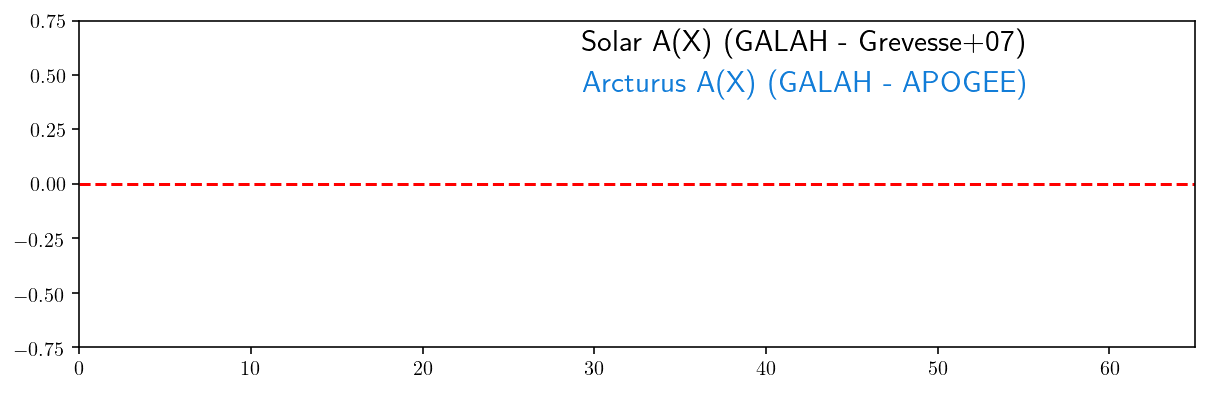

In [52]:
# plot both zeropoints

kwargs_errorbar = dict(color = 'k', capsize=3, fmt='o', ms=3)

f, (ax1) = plt.subplots(1, figsize=(10,3))

ax1.axhline(0, color='r', ls='dashed')
ax1.set_ylim(-0.651, 0.651)
ax1.set_xlim(0,65)

#ax1.text(0.45,0.975,'Solar A(X) (GALAH - Asplund+09)', fontsize=15, color='k',transform=ax1.transAxes,ha='left',va='top')
ax1.text(0.45,0.975,'Solar A(X) (GALAH - Grevesse+07)', fontsize=15, color='k',transform=ax1.transAxes,ha='left',va='top')
ax1.text(0.45,0.85,'Arcturus A(X) (GALAH - APOGEE)', fontsize=15, color=willi_blau,transform=ax1.transAxes,ha='left',va='top')

ax1.set_yticks([-0.75,-0.5, -0.25, 0.0, 0.25, 0.5,0.75])

kwargs_errorbar = dict(color = 'k', capsize=3, fmt='o', ms=3)

for it, each_key in enumerate(sun.keys()):
    if each_key not in ['teff','logg','fe_h','fe_h_atmo','vmic','vbroad','mass','lbol','age','alpha_fe']:
        try:
            ax1.errorbar(
                sun[each_key][2],
                float(sun_adopted[each_key][0]) - float(sun_grevesse[each_key][0]),
                yerr = np.sqrt(float(sun_adopted[each_key][1])**2 + float(sun[each_key][1])**2),
                **kwargs_errorbar
                )
            if each_key != sun.keys()[-1]:
                if sun.keys()[it][2] != sun.keys()[it+1][2]:
                    if each_key[2:] in ['C6588','O7772','O7774','O7775','K5802','K7699','V4747','V4784','V4797','V4832','Y4855','Y4884','Y5663','Y5729']: 
                        ax1.text(sun[each_key][2], -.825 + it%4*0.1, each_key[2:][:1],ha='center')
                    else:
                        ax1.text(sun[each_key][2], -.825 + it%4*0.1, each_key[2:][:2],ha='center')
            else:
                ax1.text(sun[each_key][2], -.825 + it%4*0.1, each_key[2:][:2],ha='center')
        except:
            pass

kwargs_errorbar = dict(color = willi_blau, capsize=3, fmt='o', ms=3)

ax1.set_title('Abundance zeropoints for the Sun and Arcturus', fontsize=20)

ax1.axhline(0, color='r', ls='dashed')
ax1.set_ylim(-0.851, 0.851)
ax1.set_xlim(0,65)
ax1.set_xlabel('Z of element X')
ax1.set_ylabel(r'$\Delta$ A(X)')

for it, each_key in enumerate(arcturus.keys()):
    if each_key not in ['teff','logg','fe_h','fe_h_atmo','vmic','vbroad','mass','lbol','age','alpha_fe']:
        try:
            ax1.errorbar(
                sun[each_key][2],
                float(galah_arcturus[each_key][0]) - float(arcturus[each_key][0]),
                yerr = np.sqrt(float(galah_arcturus[each_key][1])**2 + float(arcturus[each_key][1])**2),
                **kwargs_errorbar
                )
        except:
            pass

plt.tight_layout()
plt.savefig('figures/abundance_zeropoints.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/abundance_zeropoints.pdf', dpi=300, bbox_inches='tight')

In [ ]:
sys.exit('The rest is not important')

In [ ]:
mode_DR3 = pandas.read_csv('mode_DR3', delim_whitespace=True, usecols=(0,1,2,3,4,5))

In [ ]:
data_sp    = Table.read('../data_products/GALAH_iDR3_combined_10k.fits')
data_abund = Table.read('../data_products/GALAH_iDR3_combined_10k_abund.fits')
data = join(data_sp, data_abund,keys='sobject_id',uniq_col_name='{col_name}{table_name}',table_names=['','2'])

In [ ]:
def plot_abundance_fit(line, standard, ax, zoom=False):
    if standard == 'Sun':
        sobject_id = 150405000901378
        galah_dict = galah_sun
        literature_dict = sun
        literature_name = 'G+07'
    elif standard == 'Arcturus':
        sobject_id = 150210005801171
        galah_dict = galah_arcturus
        literature_dict = arcturus
        literature_name = 'APO'
        
    kwargs_sme_sob = dict(fmt='o',c='k',ms=2,capsize=3,rasterized=True)
    kwargs_sme_smod = dict(c='r',rasterized=True)
    
    ax.set_title(standard)

    sme = readsav('OUTPUT_gbs_lbol/gbs_lbol_'+str(sobject_id)+'_DR3_'+line+'_SME.out').sme[0]
    
    if zoom == False:
        errorbar_label = 'Obs.'
    else:
        errorbar_label = '_nolegend_'
    
    ax.errorbar(
            sme.wave,
            sme.sob,
            yerr = sme.uob,
            label=errorbar_label,
            **kwargs_sme_sob
            )
    ax.plot(
            sme.wave,
            sme.smod,
            label='Fit',
            zorder=5,
            **kwargs_sme_smod
            )
    ax.set_xlabel(r'Wavelength [$\AA$]')
    ax.set_ylabel(r'Flux [norm]')
    
    offsets = ['-0.5','-0.25','-0.1','-0.05','0.05','0.1','0.25','0.5']
    offset_names = ['minus0p5','minus0p25','minus0p1','minus0p05','plus0p05','plus0p1','plus0p25','plus0p5']
    linewidths = [0.2,0.4,0.6,0.8,0.8,0.6,0.4,0.2]

    in_mode = np.where(mode_DR3[';elem']==line)[0][0]
    
    in_mask = (sme.wave >= mode_DR3['maskst'][in_mode] - 0.15) & (sme.wave <= mode_DR3['maskend'][in_mode] + 0.15)
    
    mask_line = sme.wave[in_mask]

    if zoom == True:

        min_smod = []
        max_smod = []
        
        min_smod.append(np.min(sme.sob[in_mask]-sme.uob[in_mask]))
        max_smod.append(np.max(sme.sob[in_mask]+sme.uob[in_mask]))

    offset_labels = [r'$\pm$ 0.5',r'$\pm$ 0.25',r'$\pm$ 0.1',r'$\pm$ 0.05']
        
    for each_offset_index,(each_offset,each_offset_name) in enumerate(zip(offsets,offset_names)):
        chosen_label = '_nolegend_'
        if (each_offset_index <= 3) & (zoom==True):
            chosen_label = offset_labels[each_offset_index]
        
        sme = readsav('OUTPUT_gbs_lbol/'+line+'/gbs_lbol_'+str(sobject_id)+'_DR3_'+line+'_SME_'+each_offset_name+'.out').sme[0]
        ax.plot(
            sme.wave,
            sme.smod,
            lw = linewidths[each_offset_index],
            label=chosen_label,
            c='orange',
            rasterized=True
        )
        if zoom == True:
            min_smod.append(np.min(sme.smod[in_mask]))
            max_smod.append(np.max(sme.smod[in_mask]))
        
    if zoom == False:
        ax.axvspan(sme.wave[(sme.mob==1)][0],sme.wave[(sme.mob==1)][-1],color='lavender', label='Mask', alpha=0.25)

    ax.axvline(float(mode_DR3['lambda'][in_mode]),c='cornflowerblue',ls='dashed', label='Line')

    kwargs_text = dict(transform=ax.transAxes,fontsize=12)
    
    if zoom == False:
        ax.legend(loc='lower right', fontsize=10)
        ax.text(0.035,0.3,'A('+line+')',**kwargs_text)
        ax.text(0.035,0.25,literature_name,**kwargs_text)
        ax.text(0.375,0.15,'= '+"{:.2f}".format(literature_dict['A_'+line][0])+r' $\pm$ '+"{:.2f}".format(literature_dict['A_'+line][1]),ha='right',**kwargs_text)
        ax.text(0.035,0.2,'GALAH',**kwargs_text)
        ax.text(0.375,0.1,'= '+"{:.2f}".format(galah_dict['A_'+line][0])+r' $\pm$ '+"{:.2f}".format(galah_dict['A_'+line][1]),ha='right',**kwargs_text)
        ax.text(0.375,0.05,r'$\rightarrow$ '+"{:.2f}".format(galah_dict['A_'+line][0]-literature_dict['A_'+line][0])+r' $\pm$ '+"{:.2f}".format(np.sqrt(galah_dict['A_'+line][1]**2+literature_dict['A_'+line][1]**2)),ha='right',**kwargs_text)
    else:
        ax.set_xlim(mask_line[0],mask_line[-1])
        ax.set_ylim(np.min(np.array(min_smod)),np.max(np.array(max_smod)))
        ax.legend(fontsize=10)

In [ ]:
def plot_contours(data, line, ax, abundance_limits = [-0.5,1.0], cmap='Blues', plot_contour=True):
    
    H,xe,ye=np.histogram2d(
    data['fe_h'],
    data[line+'_fe'],
    bins = (
            np.linspace(-3,1,75),
            np.linspace(abundance_limits[0],abundance_limits[1],75)
        )
    )
    
    contourf = ax.contourf(
        xe[:-1]+0.5*(xe[1]-xe[0]),
        ye[:-1]+0.5*(ye[1]-ye[0]),
        np.log10(H.T),
        10, cmap=plt.cm.bone, origin='lower')
    cbar = plt.colorbar(contourf, ax=ax)
    if plot_contour==True:
        contour = ax.contour(contourf, levels=contourf.levels[::2], cmap=cmap, origin='lower', linewidths=1)
        cbar.add_lines(contour)
    cbar.set_label(r'$\log_{10}$(Nr. Spectra)')

    return(contourf,contourf.levels[::2])

In [ ]:
params = {
    'font.family'        : 'sans',
    'font.size'          : 15,
    'axes.labelsize'     : 15,
    'legend.fontsize'    : 10,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }
plt.rcParams.update(params)

In [ ]:
def plot_abundance_zeropoint_overview(line, pdf, short=False, png=True):
    if line in ['C6588','O7772','O7774','O7775','K5802','K7699','V4747','V4784','V4797','V4832','Y4855','Y4884','Y5663','Y5729']:
        element = line[:1]
    else:
        element = line[:2]
    if line in [
        'Sc4744','Sc4753','Sc5672','Sc5687','Sc5717','Sc5724',
        'Ti4720','Ti4765','Ti4799','Ti4849','Ti4866','Ti4874',
        'Cr4848',
        'Y4855','Y4884','Y5663','Y5729',
        'Ba5854','Ba6497',
        'La4716','La4749','La4804','La5806',
        'Ce4774',
        'Nd4811','Nd5741','Nd5770','Nd5812','Nd5842',
        'Sm4837','Sm4854',
        'Eu5819','Eu6645'
        ]:
        element = element+'II'
    else:
        element = element+'I'

    print(line,element)

    good = (
        (data['flag_sp'] == 0) & 
        (data['flag_'+line] == 0) & 
        np.isfinite(data[element+'_fe'])
        )

    abundance_limits = [-0.5,1.0]
    if line == 'Li':
        abundance_limits = [-2.0,4.0]
    if line in ['O7772','O7774','O7775']:
        abundance_limits = [-0.5,2.0]

    f, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3,2,figsize=(8.27,11.69))

    if short==False:
        if line == 'Li':
            ax1.set_title('Line: Li6708 A='+str(galah_final['A_'+line][0]))
            ax1.set_xlabel('[Fe/H]')
            ax1.set_ylabel('[Li6708/Fe]')
        else:
            ax1.set_title('Line: '+line+' A='+str(galah_final['A_'+line][0]))
            ax1.set_xlabel('[Fe/H]')
            ax1.set_ylabel('['+line+'/Fe]')

        contourf_line, levels_line = plot_contours(data[good], line=line, ax=ax1, abundance_limits=abundance_limits, cmap='Blues', plot_contour = True)
        contourf_elem, levels_elem = plot_contours(data[good], line=element, ax=ax3, abundance_limits=abundance_limits, cmap='Reds', plot_contour = True)

        comp = line+','+element

        if (line[:2] == 'Mg') | (line[:2] == 'Si') | (line[:2] == 'Ca') | (line[:2] == 'Ti'):
            plot_contours(data[good], line='alpha', ax=ax5, abundance_limits=abundance_limits, plot_contour = False)
            comp = line+','+element+r',$\alpha$'

        contour = ax5.contour(contourf_line, levels=levels_line, cmap='Blues', origin='lower',linewidths=1)
        contour = ax5.contour(contourf_elem, levels=levels_elem, cmap='Reds', origin='lower',linewidths=1)

        ax3.set_title('Element: '+element)
        ax3.set_xlabel('[Fe/H]')
        ax3.set_ylabel('['+element+'/Fe]')

        ax5.set_ylabel(r'[X/Fe]')
        ax5.set_xlabel('[Fe/H]')
        ax5.set_title(r'X $\in$ ['+comp+']')


        if line in [
            'Mg4730','Mg5711','Mg7692',
            'Si5666','Si5684','Si5690','Si5701','Si5772','Si5793','Si6722','Si7680',
            'Ca5857','Ca5868','Ca6494','Ca6500',
            'Ti4758','Ti4759','Ti4778','Ti4782','Ti4798','Ti4802','Ti4820','Ti5689','Ti5716','Ti5720','Ti5739','Ti6717',
            'Ti4720','Ti4765','Ti4799','Ti4866','Ti4874'
            ]:
            ax5.text(0.035,0.95,r'Used for [$\alpha$/Fe]',transform=ax5.transAxes,fontsize=12,zorder=7)

        kwargs_axlines = dict(c='red',zorder=6,lw=1)    

        ax1.axvline(0,**kwargs_axlines)
        ax1.axhline(0,**kwargs_axlines)
        ax3.axvline(0,**kwargs_axlines)
        ax3.axhline(0,**kwargs_axlines)
        ax5.axvline(0,**kwargs_axlines)
        ax5.axhline(0,**kwargs_axlines)

    plot_abundance_fit(line, standard='Sun', ax=ax2)
    plot_abundance_fit(line, standard='Sun', ax=ax4, zoom=True)
    plot_abundance_fit(line, standard='Arcturus', ax=ax6)
    plt.tight_layout(h_pad=0,w_pad=0)

    #plt.savefig('abundance_zeropoints/Abundance_zerpoint_'+line+'.pdf', dpi=200)
    #plt.savefig('abundance_zeropoints/Abundance_zerpoint_'+line+'.png', dpi=200)
    pdf.savefig(dpi=200)
    
    if png==True:
        plt.savefig('Abundance_zerpoints_'+line+'.png',dpi=300,bbox_inches='tight')
    
    plt.close()

In [ ]:
# with PdfPages('Abundance_zerpoints_alpha.pdf') as pdf:
#     for line in ['Mg4730', 'Mg5711', 'Mg7692',
#                  'Si5666', 'Si5684', 'Si5690', 'Si5701', 'Si5772',
#                  'Si5793', 'Si6722', 'Si7680',
#                  'Ca5857', 'Ca5868', 'Ca6494', 'Ca6500', 'Ca6509',
#                  'Ti4758', 'Ti4759', 'Ti4778', 'Ti4782', 'Ti4798',
#                  'Ti4802', 'Ti4820', 'Ti5689', 'Ti5716', 'Ti5720',
#                  'Ti5739', 'Ti5866', 'Ti6717', 'Ti7853', 'Ti4720',
#                  'Ti4765', 'Ti4799', 'Ti4849', 'Ti4866', 'Ti4874'
#                  ]:
#         plot_abundance_zeropoint_overview(line, pdf, short=True)

In [ ]:
i = 2

with PdfPages('Abundance_zerpoints_'+str(i)+'.pdf') as pdf:
    for each_key in galah_sun.keys()[12+20*i:12+20*(i+1)]:
        if (each_key[:2] == 'A_') & (each_key[:4] != 'A_Fe') & (each_key not in ['A_Ti6599','A_Cr4848','A_Co5647']):
            line = each_key[2:]
            plot_abundance_zeropoint_overview(line, pdf, short=True, png=True)